<a href="https://colab.research.google.com/github/yashguptasln/Jacobian_method/blob/master/Copy_of_Jacobian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import math
import csv
import random
from matplotlib import pyplot as plt

In [101]:
#its changing
# Lengths for three links of the Robotic Arm
l1 = 14.0
l2 = 12.0
l3 = 6.0

# No of rows/samples to generate for the dataset
SAMPLES = 1500

# Number of digits after decimal point to keep in the data points
PRECISION = 3

# Number of epochs to iterate while training the model
NUMBER_OF_EPOCHS = 100

ARROW_LENGTH = 0.7

In [102]:
#Angles are in radians
def getXCoordinate( theta1, theta2, theta3):
    return l1* math.cos(theta1) + l2*math.cos(theta1+theta2) + l3*math.cos(theta1+theta2+theta3)

def getYCoordinate( theta1, theta2, theta3):
    return l1* math.sin(theta1) + l2*math.sin(theta1+theta2) + l3*math.sin(theta1+theta2+theta3)

def getTotalAngle(theta1, theta2, theta3):
    return (theta1 + theta2 + theta3)

In [103]:
def generateDataset():
    with open('training_data.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames = ["Q1", "Q2", "Q3", "XCoordEndEff", "YCoordEndEff", "TotalAngle"])
        writer.writeheader()

        for i in range (0,SAMPLES):
            #Randomly generating joint angles 
            q1= round(random.uniform(0, math.pi), PRECISION)
            q2= round(random.uniform(-math.pi, 0), PRECISION)
            q3= round(random.uniform(-math.pi/2, math.pi/2), PRECISION)

            writer.writerow({
                'Q1':q1,
                'Q2':q2,
                'Q3':q3,
                'XCoordEndEff':str(round(getXCoordinate(q1, q2, q3), PRECISION)),
                'YCoordEndEff':str(round(getYCoordinate(q1, q2, q3), PRECISION)),
                'TotalAngle':str(round(getTotalAngle(q1, q2, q3), PRECISION))
            })

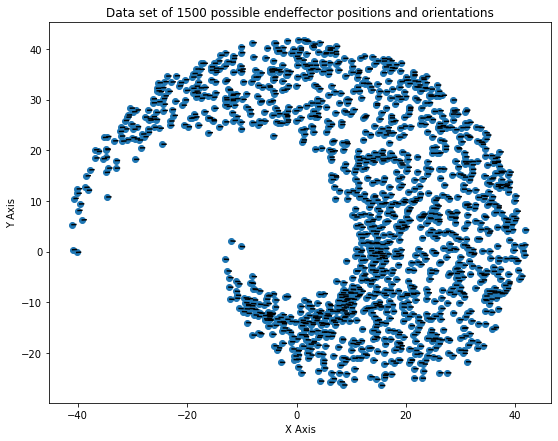

<Figure size 432x288 with 0 Axes>

In [104]:
#function to plot data points
def plotDataset():
    plt.figure(figsize=(9, 7))
    for i in range(len(coordX)):
        posx = coordX[i][0]
        posy = coordY[i][0]
        theta = thetaAng[i][0]
        plt.plot([posx, posx + ARROW_LENGTH * math.cos(math.radians(theta))], [posy, posy + ARROW_LENGTH * math.sin(math.radians(theta))],'k-')

    plt.scatter(coordX, coordY)
    plt.xlabel("X Axis")
    plt.ylabel("Y Axis")
    plt.title("Data set of " + str(SAMPLES) + " possible endeffector positions and orientations")
    dataset_fig = plt.gcf()
    plt.show()
    plt.draw()
    #dataset_fig.savefig('Plot of Data Points.png', dpi=100, bbox_inches='tight')
  
plotDataset()

In [105]:
## 3 link manipulator code
## trying to calculate values for dataset
## Angles are in Radians and so is phie
import math

def cosCalc(a, b, c):
  if(a+b < c):
    return math.pi
  elif(abs(a-b) > c):
    return 0
  return math.acos((a*a + b*b - c*c)/(2*a*b))

def inputCalc(xe,ye,phie):
  xw = xe - l3 * math.cos(phie)
  yw = ye - l3 * math.sin(phie)
  r = math.sqrt(xw**2 + yw**2)
  #print(r) ##36.00018635933355
  gamma = cosCalc(r, l1, l2)
  theta2 = math.pi - cosCalc(l1, l2, r)
  theta1 = math.atan2(yw, xw) - gamma
  theta3 = phie - theta1 - theta2
  return(float("{:.2f}".format(theta1)), float("{:.2f}".format(theta2)), float("{:.2f}".format(theta3)))


In [106]:
inputCalc(7, 7.0, 0.7853)

(-0.12, 2.88, -1.98)

In [107]:
#Uncomment the next line if to generate the dataset
generateDataset()
dataset = pd.read_csv('training_data.csv')
dataset

,Q1,Q2,Q3,XCoordEndEff,YCoordEndEff,TotalAngle
0,1.277,-2.863,-1.258,-1.864,-0.358,-2.844
1,2.753,-2.218,-0.579,3.361,11.159,-0.044
2,0.005,-0.190,0.573,31.349,0.133,0.388
3,0.027,-1.281,0.259,21.000,-16.057,-0.995
4,2.519,-2.084,-1.079,4.307,9.619,-0.644
...,...,...,...,...,...,...
1495,1.782,-1.304,0.701,10.011,24.754,1.179
1496,0.830,-1.303,-0.564,23.184,-0.301,-1.037
1497,0.809,-1.097,1.560,22.935,12.456,1.272
1498,1.312,-1.340,-1.070,18.310,7.856,-1.098


In [108]:
# Removing duplicated end effector positions
dups = dataset.duplicated(subset=["XCoordEndEff", "YCoordEndEff"])

# duplicated() method returns a series which contain false for all the unique values/rows
# Since the deduplicated dataset must contain only unique values we invert "dups" and select 
# all the rows which are true in "dups" 
dataset = dataset[~dups]
dataset

,Q1,Q2,Q3,XCoordEndEff,YCoordEndEff,TotalAngle
0,1.277,-2.863,-1.258,-1.864,-0.358,-2.844
1,2.753,-2.218,-0.579,3.361,11.159,-0.044
2,0.005,-0.190,0.573,31.349,0.133,0.388
3,0.027,-1.281,0.259,21.000,-16.057,-0.995
4,2.519,-2.084,-1.079,4.307,9.619,-0.644
...,...,...,...,...,...,...
1495,1.782,-1.304,0.701,10.011,24.754,1.179
1496,0.830,-1.303,-0.564,23.184,-0.301,-1.037
1497,0.809,-1.097,1.560,22.935,12.456,1.272
1498,1.312,-1.340,-1.070,18.310,7.856,-1.098


In [109]:
coordX = dataset.iloc[:, [3]].values
coordY = dataset.iloc[:, [4]].values
thetaAng = dataset.iloc[:, [5]].values
print(coordX)

[[-1.864]
 [ 3.361]
 [31.349]
 ...
 [22.935]
 [18.31 ]
 [15.784]]


In [110]:
## trying to store the results in pandas dataframe
results= pd.DataFrame({"q1":[],"q2":[],"q3":[]})
for i in range(len(dataset)):
  a,b,c=coordX[i,0],coordY[i,0],thetaAng[i,0]
  #print(type(a))
  new_result=np.array(inputCalc(a,b,c))
  new_data=pd.DataFrame({"q1":[new_result[0]],"q2":[new_result[1]],"q3":[new_result[2]]})
  results=results.append(new_data, ignore_index=True)
results

,q1,q2,q3
0,-0.58,2.86,-5.12
1,0.84,2.22,-3.10
2,-0.17,0.19,0.37
3,-1.14,1.28,-1.14
4,0.70,2.08,-3.42
...,...,...,...
1495,0.60,1.30,-0.72
1496,-0.36,1.30,-1.98
1497,-0.19,1.10,0.37
1498,0.09,1.34,-2.53


[-0.06, 2.68, -1.66, 7, 10.0, 0.960070362405688]


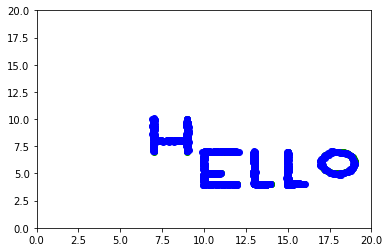

In [115]:
## trying to plot "HELLO"

import math as m

def helloFile():
  with open('hello.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)

        # for H
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 7
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        print(row)

        arr=np.linspace(7,9,100)
        for i in arr:
            j=8
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(7,10,100)
        for j in arr:
            i= 9
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for E
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 10
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        arr=np.linspace(10,12,100)
        for i in arr:
            j=7
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,11,100)
        for i in arr:
            j=5
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,12,100)
        for i in arr:
            j=4
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for L
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 13
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(13,14,100)
        for i in arr:
            j=4
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for L
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 15
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(15,16,100)
        for i in arr:
            j=4
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        Xc = 18
        Yc = 6
        r = 1
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.atan(j/i)
            q1,q2,q3=inputCalc(i,j,theta)
            row = [q1,q2,q3,i,j,theta]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
  csvFile.close()
        
    
helloFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'hello.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
